**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**


# Introducción al Aprendizaje Automatico

Grupo 15:

Fassi, Carolina Noelia.

Fassi, Angel Maximiliano.

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Modelos
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV,train_test_split

#Metricas
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

#Informes
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [4]:
dataset = pd.read_csv("loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocesamiento
SS = StandardScaler()
x_train = SS.fit_transform(X_train)
x_test = SS.fit_transform(X_test)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:
1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

In [5]:
dataset.shape

(1854, 11)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TARGET   1854 non-null   int64  
 1   LOAN     1854 non-null   int64  
 2   MORTDUE  1854 non-null   float64
 3   VALUE    1854 non-null   float64
 4   YOJ      1854 non-null   float64
 5   DEROG    1854 non-null   float64
 6   DELINQ   1854 non-null   float64
 7   CLAGE    1854 non-null   float64
 8   NINQ     1854 non-null   float64
 9   CLNO     1854 non-null   float64
 10  DEBTINC  1854 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 159.5 KB


In [7]:
dataset.sample(5)

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
979,0,15900,52012.0,105877.0,0.0,0.0,2.0,50.531562,1.0,10.0,40.392257
1487,0,9000,56162.0,75526.0,6.0,0.0,0.0,127.786970,0.0,15.0,35.734057
1662,1,13400,58307.0,71810.0,9.0,0.0,2.0,82.708309,2.0,32.0,36.947798
83,0,28400,183314.0,232345.0,1.0,0.0,0.0,300.904310,1.0,32.0,42.336227
1306,0,24600,113034.0,165176.0,15.0,0.0,0.0,194.842164,0.0,26.0,32.770148


1. El dataset contiene 1854 registros con 10 atributos que brindan información sobre tomadores de prestamos, es un dataset ya depurado donde no existen datos nulos ni faltantes.


2. TARGET: Es una variable binaria que indica si el tomador del credito incumplio o entro en mora (1) o si repago su deuda en las condiciones establecidas (0).


3. 
* LOAN:    Montos totales solicitados en los prestamos. 
* MORTDUE: Montos de deuda en prestamos preexistentes.
* VALUE:   Valor actual de su propiedad.
* YOJ:     Antiguedad en su trabajo actual.
* DEROG:   Numero de etiquetas "major derogatory", si bien este criterio puede variar para cada acreedor, generalmente se define un "major derogatory" como una morosidad grave con 30 días o más de vencida.
* DELINQ:  Cantidad de lineas de credito con morosidad.
* CLAGE:   Maxima antiguedad de linea de credito.
* NINQ:    Numero de lineas de credito recientes.
* CLNO:   Numero de lineas de credito.
* DEBTINC: Relacion deuda/ingreso.



4. Analizando rapidamente la situación, los atributos que suponemos más determinantes al momento de predecir si un cliente incurrirá en morosidad son:
  - DEBTINC, MORTDUE y LOAN: Dado que una persona tiene que cubrir necesidades basicas impostergables con su ingreso, la proporcion de la  (DEBTINC), ya contraida (MORTDUE) más la solicitada (LOAN), sobre el ingreso no puede ser nunca 1, puede ser algo mayor para personas de ingresos muy altos (con un ingreso disponible luego de cubrir necesidades basicas más alto) y menor para los de menor ingreso.
  - DELINQ y DEROG: Si una persona tiene una o más líneas de credito con morosidad o morosidad grave, aumentara mucho la probabilidad de que se incurra en una nueva morosidad en otra linea de credito. 
  - YOJ: Una cliente con mucha antiguedad en su trabajo será menos propenso a abandonarlo o perderlo y por consiguiente quedarse sin ingresos de forma repentina.

In [8]:
#dataset

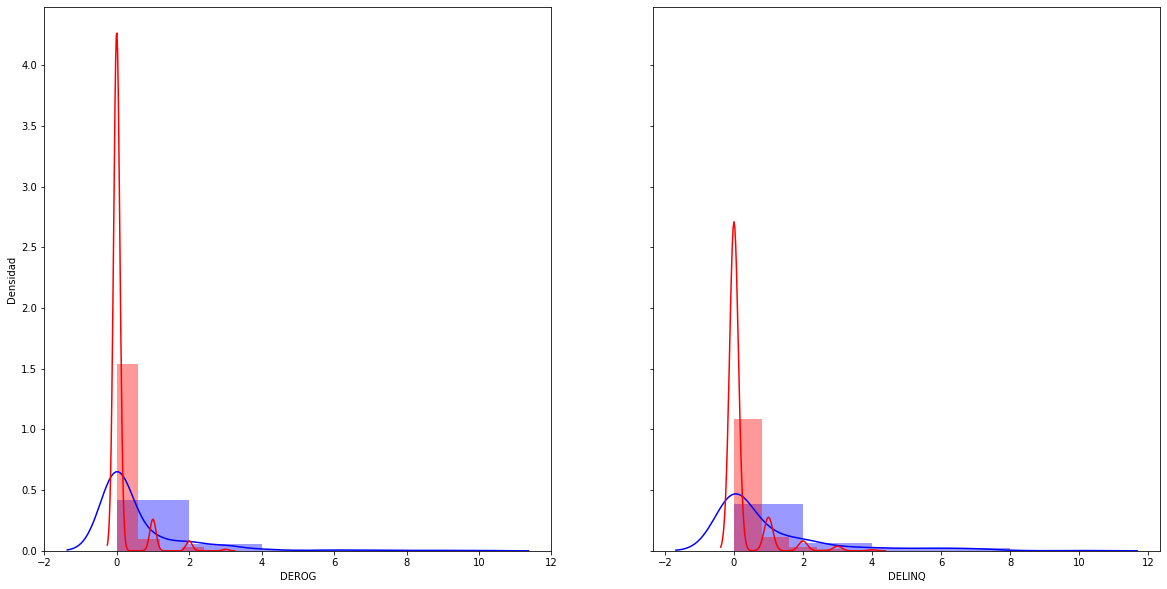

In [9]:
#Graficas de algunas variables categoricas
is_moroso = dataset.TARGET == 1
groupA = dataset[is_moroso]
groupB = dataset[~is_moroso]

fig, axes=plt.subplots(1, 2, figsize=(20, 10), sharey=True)
for var, ax in zip(['DEROG','DELINQ'], axes):
  ax=sns.distplot(groupA[var], bins=5, color='b',ax=ax)
  ax=sns.distplot(groupB[var], bins=5, color='r',ax=ax)
  ax.set_ylabel('Densidad')
  if ax != axes[0]:
    ax.set_ylabel('')   

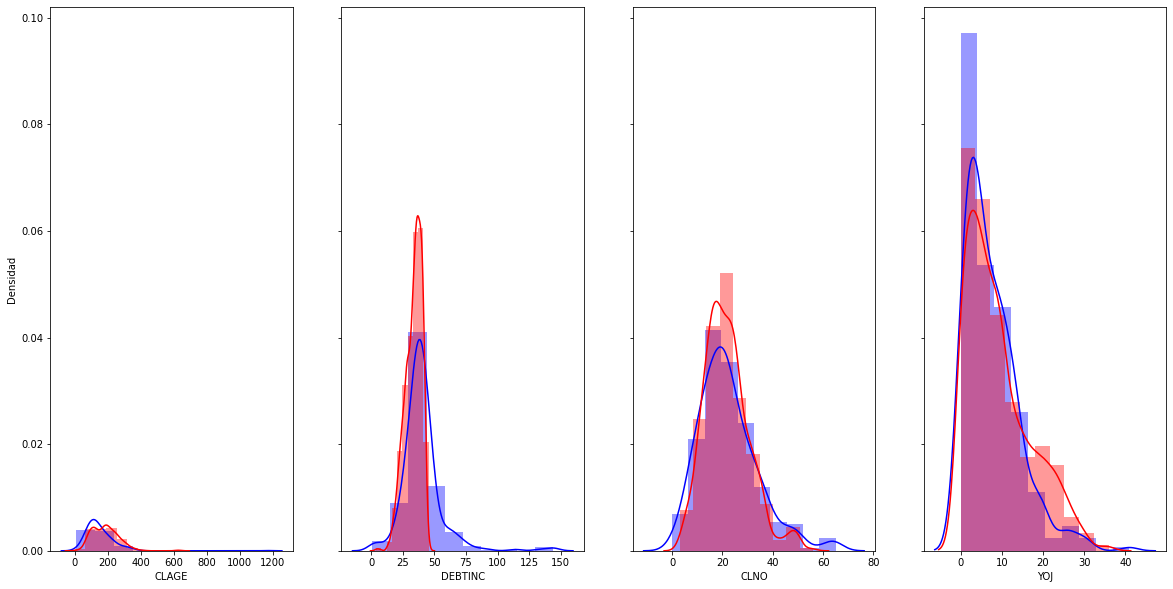

In [10]:
#Graficas de algunas variables categoricas
is_moroso = dataset.TARGET == 1
groupA = dataset[is_moroso]
groupB = dataset[~is_moroso]

fig, axes=plt.subplots(1, 4, figsize=(20, 10), sharey=True)
for var, ax in zip(['CLAGE','DEBTINC', 'CLNO','YOJ'], axes):
  ax=sns.distplot(groupA[var], bins=10, color='b',ax=ax)
  ax=sns.distplot(groupB[var], bins=10, color='r',ax=ax)
  ax.set_ylabel('Densidad')
  if ax != axes[0]:
    ax.set_ylabel('')

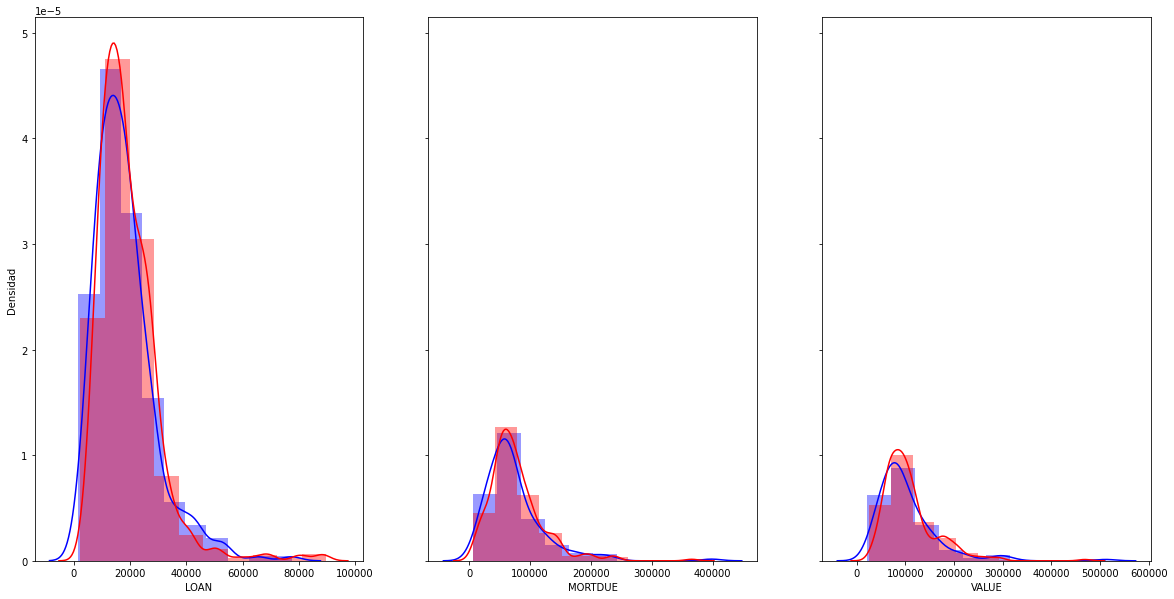

In [11]:
#Graficas de algunas variables categoricas
is_moroso = dataset.TARGET == 1
groupA = dataset[is_moroso]
groupB = dataset[~is_moroso]

fig, axes=plt.subplots(1, 3, figsize=(20, 10), sharey=True)
for var, ax in zip(['LOAN','MORTDUE', 'VALUE'], axes):
  ax=sns.distplot(groupA[var], bins=10, color='b',ax=ax)
  ax=sns.distplot(groupB[var], bins=10, color='r',ax=ax)
  ax.set_ylabel('Densidad')
  if ax != axes[0]:
    ax.set_ylabel('')   


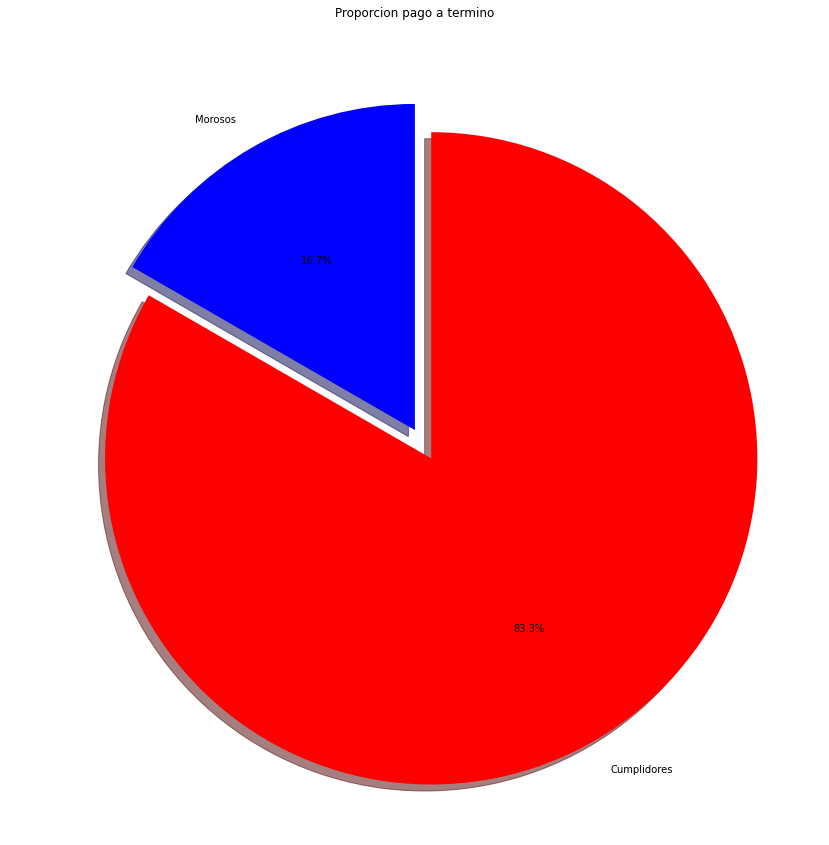

In [12]:
#Proporcion de morosos/no morosos 
fig = plt.figure(figsize=(15,15))
labels = "Morosos","Cumplidores"
sizes = [len(groupA), len(groupB)]
colores = ["b","red"]
desfase = (0,  0.1)
ax1=plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colores, explode=desfase)
plt.title ("Proporcion pago a termino")
plt.show() 

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Datos de evaluacion sobre el conjunto de Train:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1232
           1       0.40      0.40      0.40       251

    accuracy                           0.80      1483
   macro avg       0.64      0.64      0.64      1483
weighted avg       0.80      0.80      0.80      1483



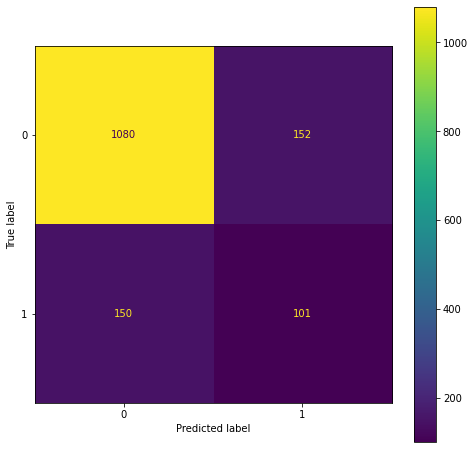

--------------------------------------------------------------
--------------------------------------------------------------
Datos de evaluacion sobre el conjunto de Test:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       313
           1       0.34      0.36      0.35        58

    accuracy                           0.79       371
   macro avg       0.61      0.62      0.61       371
weighted avg       0.80      0.79      0.79       371



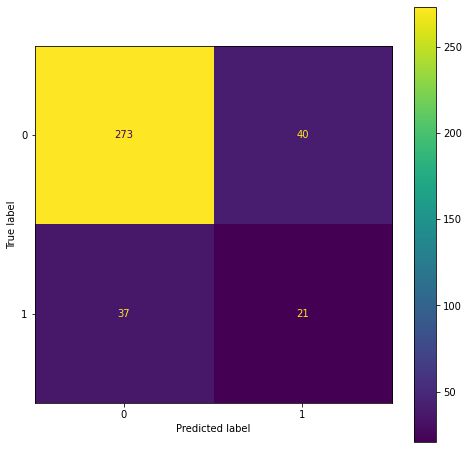

In [13]:
mod_SGD = SGDClassifier(random_state=13) #Entrenamiento del modelo con parametros por defecto, solo determinamos el seed
mod_SGD.fit(x_train, y_train)

train_pred = mod_SGD.predict(x_train)
test_pred = mod_SGD.predict(x_test)


print('Datos de evaluacion sobre el conjunto de Train:')
print(classification_report(y_train, train_pred))
plt.rcParams["figure.figsize"] = (8, 8)
plot_confusion_matrix(mod_SGD, x_train, y_train)
plt.show()

print('--------------------------------------------------------------')
print('--------------------------------------------------------------')

print('Datos de evaluacion sobre el conjunto de Test:')
print(classification_report(y_test, test_pred))
plt.rcParams["figure.figsize"] = (8, 8)
plot_confusion_matrix(mod_SGD, x_test, y_test)
plt.show()

Este clasificador con los parametros por defectos, resulta deficiente al momento de detectar morosos ya que no pondera correctamente la importancia que tiene a nuestro criterio personal la ocurrencia de falsos negativos.
Tanto para el conjunto Train como para el conjunto Test, balancea las apariciones de errores de tipo FN y FP, cuando en este caso particular la aparición de FN reviste mayor gravedad.

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



In [14]:
mod_SGD.max_iter = 25000 #Establecemos un máximo de iteraciones, usamos un numero alto para lograr convergencia con la mayor cantidad posible de permutaciones de HP
#Sin embargo con valores de eta0 tendientes a 0, sigue sin ser suficientes, pero aumentar el numero de iteraciones aumenta mucho el tiempo de ejecucion.
#Decidimos excluir este HP del param_grid porque el tiempo de ejecucion aumenta de manera exponencial.

mod_SGD.class_weight='balanced' #La morosidad tiene una distribucion muy desigual (solo 17% del total), cuando este parametro no tiene encuenta el peso de las clases 
#arroja clasificaciones sesgadas, sin importar el scoring utilizado, el resultado arroja muy pocos falsos positivos pero si muchos falsos negativos. 

mod_SGD.random_state=13 #Mantenemos la seed utilizada anteriormente.

mod_SGD.get_params() #Lista de parametros que podemos incluir.

{'alpha': 0.0001,
 'average': False,
 'class_weight': 'balanced',
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 25000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 13,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [15]:
#Listamos los parametros con los respectivos valores que tomaran en cada permutacion. 
param_grid = {
    'loss': ['hinge', 'squared_hinge','perceptron', 'log','log_loss', 'modified_huber', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'learning_rate':['constant', 'optimal', 'invscaling', 'adaptive'],
    'alpha':[0.02, 0.01, 0.00005, 0.00004, 0.00003, 0.00002, 0.00001],
    'penalty':['l2', 'l1', 'elasticnet'],
    'eta0':[0.1, 0.5, 1, 10, 15, 20, 25, 50],
    #'class_weight':['None', 'balanced'] # Al agregar la opcion balanced, sin importar el scoring utilizado, la arroja como optima por lo que la fijamos para optimizar.
    #'max_iter':[5000, 10000, 25000, 50000, 100000] #poner varios valores aumenta excesivamente el tiempo de ejecucion
    }

In [16]:
cv = GridSearchCV(mod_SGD, param_grid, scoring='balanced_accuracy', cv=None) #cv=none es 5-fold cross-validation
cv.fit(x_train, y_train)

#Resultados del ajuste
resultados=pd.DataFrame(cv.cv_results_)
#resultados

#Mejores hiperparametros
cv.best_params_

{'alpha': 2e-05,
 'eta0': 10,
 'learning_rate': 'invscaling',
 'loss': 'hinge',
 'penalty': 'l2'}

Datos de evaluacion sobre el conjunto de Train:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1232
           1       0.40      0.62      0.49       251

    accuracy                           0.78      1483
   macro avg       0.66      0.72      0.68      1483
weighted avg       0.83      0.78      0.80      1483



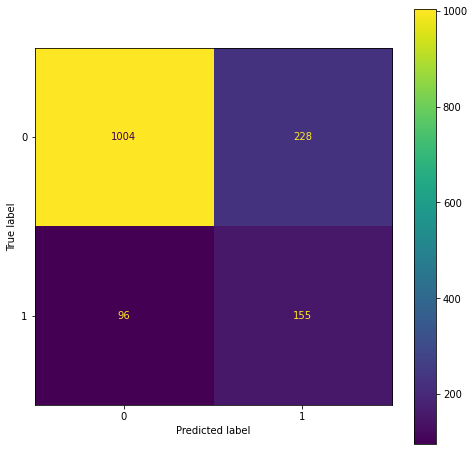

--------------------------------------------------------------
Datos de evaluacion sobre el conjunto de Test:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       313
           1       0.40      0.67      0.50        58

    accuracy                           0.79       371
   macro avg       0.67      0.74      0.69       371
weighted avg       0.85      0.79      0.81       371



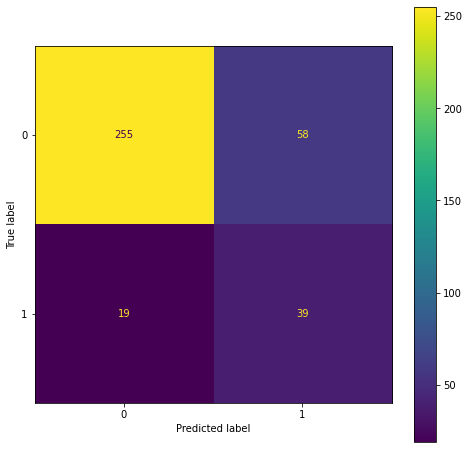

In [17]:
#Mejores parametros para predicción de morosos (se minimiza la probabilidad de clasificar un cliente como pagador cuando en realidad es moroso)
mod_SGD = SGDClassifier(random_state=13, alpha=0.00002, class_weight='balanced', eta0 = 10, learning_rate='invscaling', loss='hinge', penalty='l2', max_iter=25000) #'balanced_accuracy' o 'average_precision'   FN=19 FP=58 vs FN=37 FP=40  
#mod_SGD = SGDClassifier(random_state=13, alpha=0.0002, class_weight='balanced', eta0 = 10, learning_rate='invscaling', loss='hinge', penalty='l2', max_iter=25000)  # recall_macro                              FN=12 FP=129 vs FN=37 FP=40

#Mejores parametros para predicción de pagadores (se minimiza la probabilidad de clasificar un cliente como moroso cuando en realidad pagara su credito)
#mod_SGD = SGDClassifier(random_state=13, alpha=0.02, class_weight='balanced', eta0 = 0.1, learning_rate='adaptive', loss='huber', penalty='l1', max_iter=25000) #'precision'                                    FN=45 FP=1  vs FN=37 FP=40

mod_SGD.fit(x_train, y_train)

train_pred = mod_SGD.predict(x_train)
test_pred = mod_SGD.predict(x_test)

#accuracy_SGD = accuracy_score(y_test, test_pred)

print('Datos de evaluacion sobre el conjunto de Train:')
print(classification_report(y_train, train_pred))
plt.rcParams["figure.figsize"] = (8, 8)
plot_confusion_matrix(mod_SGD, x_train, y_train)
plt.show()


print('--------------------------------------------------------------')
print('Datos de evaluacion sobre el conjunto de Test:')
print(classification_report(y_test, test_pred))
plt.rcParams["figure.figsize"] = (8, 8)
plot_confusion_matrix(mod_SGD, x_test, y_test)
plt.show()

El modelo graficado corresponde a los parametros conseguidos con el scoring 'average_precision' o 'balanced_accuracy', elegimos estos scores ya que permiten trabajar con clases desbalanceadas como tenemos en este caso, promediando el recall en un caso o realizando un promedio ponderado combinando recall y presicion. 
Consideramos que es un buen modelo ya que disminuye mucho el numero de errores de falso negativo (clientes clasificados como "pagadores" cuando en realidad son "morosos") esta configuracion sobre el conjunto de test detecta 18 clientes morosos más que los detectados con los parametros por defecto, aunque esto genera tambien un leve aumento en los errores de falsos positivos.

Elegimos esta configuración como la mejor a nuestro criterio ya que estamos haciendo un análisis desde el punto de vista del acreedor, nos interesa tener un mayor control del riesgo de mora, aunque eso conlleve a la perdida de algunos clientes, de todas formas no se trata de la configuración más conservadora que podemos conseguir, ya que podemos disminuir hasta un 30% más la aparicion de falsos negativos, pero a costa de duplicar los falsos positivos, no elegimos un modelo de este tipo porque consideramos que si bien toda empresa tiene como objetivo cuidar sus recursos, una politica de tan bajo riesgo y proteccion del capital, entraria en conflicto con la posibilidad de obtener beneficios y con la vision social de desarrollo. 

De todas maneras para una elección final deberiamos contar con más detalles acerca del modelo de negocios, los margenes de beneficio o la mision y vision de la empresa, etc. 

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Datos de evaluacion sobre el conjunto de Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



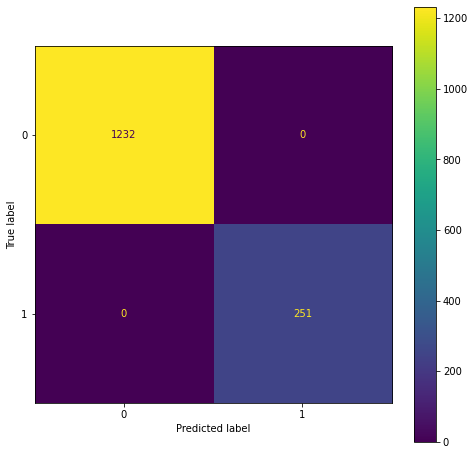

--------------------------------------------------------------
--------------------------------------------------------------
Datos de evaluacion sobre el conjunto de Test:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       313
           1       0.58      0.72      0.64        58

    accuracy                           0.87       371
   macro avg       0.76      0.81      0.78       371
weighted avg       0.89      0.87      0.88       371



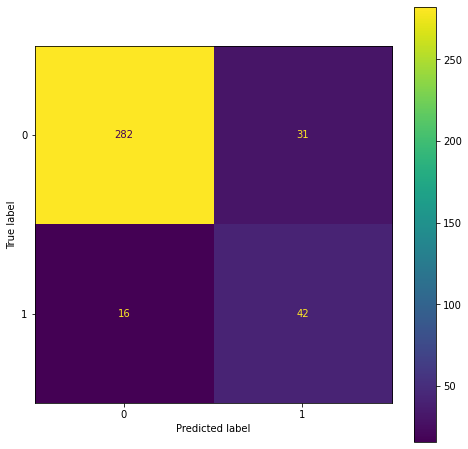

In [18]:
mod_DTclfs = DecisionTreeClassifier(random_state=13) #Entrenamiento del modelo con parametros por defecto, solo determinamos el seed
mod_DTclfs.fit(x_train, y_train)

train_pred = mod_DTclfs.predict(x_train)
test_pred = mod_DTclfs.predict(x_test)

print('Datos de evaluacion sobre el conjunto de Train:')
print(classification_report(y_train, train_pred))
plt.rcParams["figure.figsize"] = (8, 8)
plot_confusion_matrix(mod_DTclfs, x_train, y_train)
plt.show()


print('--------------------------------------------------------------')
print('--------------------------------------------------------------')


print('Datos de evaluacion sobre el conjunto de Test:')
print(classification_report(y_test, test_pred))
plt.rcParams["figure.figsize"] = (8, 8)
plot_confusion_matrix(mod_DTclfs, x_test, y_test)
plt.show()

En este modelo, incluso con los parametros por defectos, podemos ver que el arbol da muy buenos resultados sobre el conjunto Test, pero lo más sorprendente es que se adapte perfectamente al conjunto Train. Una de las posibles causas de este comportamiento es que al no ser tener un numero tan grande de observaciones y no limitar las divisiones, el arbol se ramifico en una estructura tan compleja como el conjuto sobre el que entrena, es decir que se genero un nodo terminal para cada observacion.  

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [19]:
mod_DTclfs.class_weight={0: 0.185, 1: 0.815} #La morosidad tiene una distribucion muy desigual (solo 17% del total), cuando este parametro no tiene encuenta el peso de las clases 
#arroja clasificaciones sesgadas, sin importar el scoring utilizado, el resultado arroja muy pocos falsos positivos pero si muchos falsos negativos. 

mod_DTclfs.random_state=13 #Mantenemos la seed utilizada anteriormente.

mod_DTclfs.get_params() #Lista de parametros que podemos incluir.

{'ccp_alpha': 0.0,
 'class_weight': {0: 0.185, 1: 0.815},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 13,
 'splitter': 'best'}

In [20]:
#Listamos los parametros con los respectivos valores que tomaran en cada permutacion. 
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth': range(20,35),
    'max_features' : range(1,10),
    'min_samples_leaf':range(1,10),
    #'class_weight':['None','balanced']
    }

In [21]:
cv = GridSearchCV(mod_DTclfs, param_grid, scoring='f1_macro', refit = True, cv=5) # 5-fold cross-validation
cv.fit(x_train, y_train)

#Resultados del ajuste
resultados=pd.DataFrame(cv.cv_results_)

#Mejores hyperparametros
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 22,
 'max_features': 6,
 'min_samples_leaf': 1,
 'splitter': 'best'}

Datos de evaluacion sobre el conjunto de Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



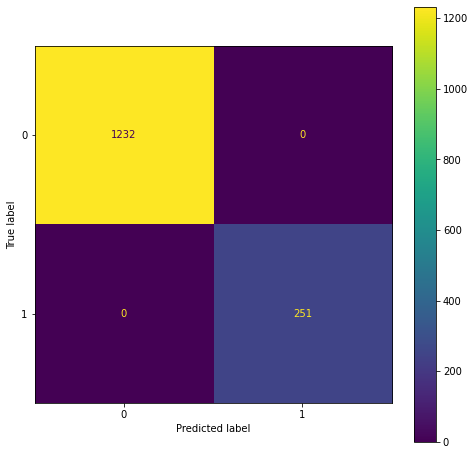

--------------------------------------------------------------
Datos de evaluacion sobre el conjunto de Test:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.63      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.78      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371



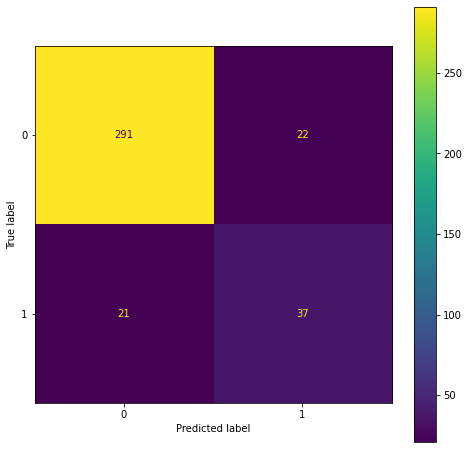

In [22]:
#Modelo Balanceado con scores altos
mod_DTclfs = DecisionTreeClassifier(random_state=13, class_weight={0: 0.185, 1: 0.815}, criterion='entropy', max_depth=22, max_features=6, min_samples_leaf=1, splitter='best') #'f1_macro'             FN=17 FP=22 vs FN=16 FP=31

mod_DTclfs.fit(x_train, y_train)
train_pred = mod_DTclfs.predict(x_train)
test_pred = mod_DTclfs.predict(x_test)

print('Datos de evaluacion sobre el conjunto de Train:')
print(classification_report(y_train, train_pred))
plt.rcParams["figure.figsize"] = (8, 8)
plot_confusion_matrix(mod_DTclfs, x_train, y_train)
plt.show()

print('--------------------------------------------------------------')
print('Datos de evaluacion sobre el conjunto de Test:')
print(classification_report(y_test, test_pred))
plt.rcParams["figure.figsize"] = (8, 8)
plot_confusion_matrix(mod_DTclfs, x_test, y_test)
plt.show()

Este modelo ya con los parametros por defecto es muy superior al modelo anterior, con el ajuste de HP introduciendo el peso de clase de forma manual (ya que con el balanceo automatico no alcanzaba para mejorar de manera significativa la prediccion) y el score F1 donde, 

$F1=2 \frac{precision X recall}{precision + recall} $

logramos un modelo balanceado con una accuracy muy alta y un numero bajo y similar de falsos positivos y falsos negativos.


Sin embargo tambien podemos ajustarlo, con el mismo criterio utilizado en el ejercicio anterior (dandole la mayor importancia a la minimizacion de falsos negativos a costa de sacrificar una porcion del negocio, minimizando el riesgo menor para el acreedor), obtenemos los HP utilizando el score recall (que se calcula como 

$Recall= \frac{Positivos V}{Positivos V + Negativos F} $

El modelo obtenido tiene scores generales mas bajos pero tiene mucha precision para detectar mora, lo graficamos a continuacion. 

Al igual que en el caso anterior necesitariamos contar con mas información acerca del tipo de negocio y las politicas implementadas para optar por una u otra configuración.

Datos de evaluacion sobre el conjunto de Train:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1232
           1       0.52      0.96      0.67       251

    accuracy                           0.84      1483
   macro avg       0.75      0.89      0.79      1483
weighted avg       0.91      0.84      0.86      1483



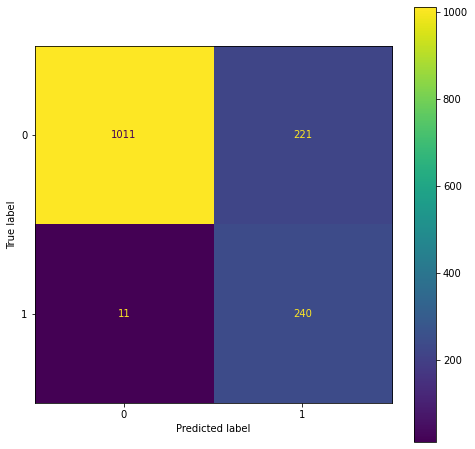

--------------------------------------------------------------
Datos de evaluacion sobre el conjunto de Test:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       313
           1       0.36      0.88      0.51        58

    accuracy                           0.74       371
   macro avg       0.67      0.80      0.67       371
weighted avg       0.87      0.74      0.77       371



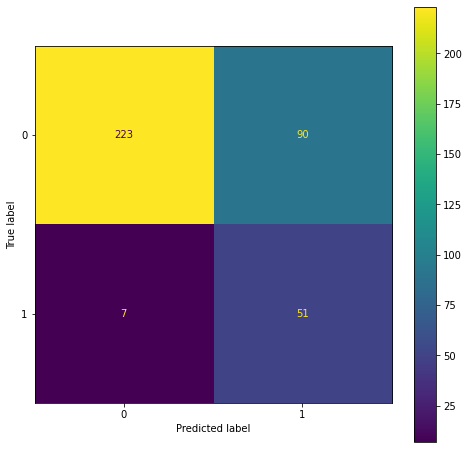

In [23]:
mod_DTclfs = DecisionTreeClassifier(random_state=13, class_weight={0: 0.185, 1: 0.815}, criterion='gini', max_depth=100, max_features=10, min_samples_leaf=10, splitter='best') #'recall_micro'               FN=7 FP=90 vs FN=16 FP=31 oko

mod_DTclfs.fit(x_train, y_train)

train_pred = mod_DTclfs.predict(x_train)
test_pred = mod_DTclfs.predict(x_test)


print('Datos de evaluacion sobre el conjunto de Train:')
print(classification_report(y_train, train_pred))
plt.rcParams["figure.figsize"] = (8, 8)
plot_confusion_matrix(mod_DTclfs, x_train, y_train)
plt.show()


print('--------------------------------------------------------------')
print('Datos de evaluacion sobre el conjunto de Test:')
print(classification_report(y_test, test_pred))
plt.rcParams["figure.figsize"] = (8, 8)
plot_confusion_matrix(mod_DTclfs, x_test, y_test)
plt.show()

Como conclusion final dadas las metricas utilizadas el DecisionTreeClassifier es superior al modelo anterior, además dado que nuestro analisis lo realizamos desde la óptica del riesgo para el banco de prestar a clientes que incurran luego en mora, consideramos que este ultimo modelo y configuración es el mejor ya que minimiza los errores de tipo Falso Negativo, que son los más peligrosos para la situación de la institucion. 